In [1]:
# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# numerical python
import numpy as np

# plotting
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [15]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
def define_model():
    model = Sequential()
    model.add(Conv2D(filters = 30, kernel_size = (5, 5), input_shape=(28, 28, 1), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='sigmoid'))
    return model

def compile_model(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# build the model
model = define_model()
compile_model(model)

In [7]:
# use this in a terminal cd'd to folder of this notebook:
#    tensorboard --logdir Graph

# add a tensorboard callback object
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, callbacks=[tbCallBack])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 3200/60000 [>.............................] - ETA: 42s - loss: 2.2339 - acc: 0.3044

KeyboardInterrupt: 

In [68]:
# save the model
model.save("Model/mnist_model.h5")

In [72]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 98.39%
Error: 1.61%


prediction: 8, label: 3


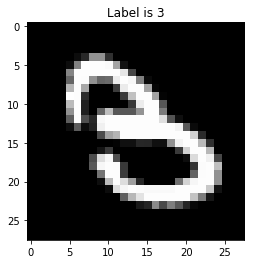

In [8]:
# predictions
test_num = 18

prediction = model.predict_classes(np.expand_dims(X_test[test_num], 0))[0]
label = np.argmax(y_test[test_num])
print("prediction: ", prediction, ", label: ", label, sep = "")
 # Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(X_test[test_num][:,:,0], cmap='gray')
plt.show()


In [2]:
# load the model
model = load_model("Model/mnist_model.h5")